In [17]:
import warnings
warnings.simplefilter('ignore')
import h5py  # API for Heirarchical Data Format files
import numpy as np

from urllib.request import urlretrieve

FIGURE_DIR = '/Users/mt/workspace/papers/complexity-special/Figures/'

# Intro

In this notebook we demonstrate how to reproduce our results. In the process, the reader will learn which Python functions produced which datasets, which were used in each figure. The data is publically available. You can download a zip file of all the data (15GB zipped) from [this link](http://mt.digital). 

# Final polarization is sensitive to update path

To demonstrate that identical initial conditions can result in very different final polarizations, we held two different instances of initial conditions constant, and ran 100 simulations for each of them. One of the initial conditions had led to the highest final polarization of the 100 trials with different initial conditions with a connected caveman network. The other set of initial opinions had led to the smallest final polarization of the 100 trials. 

All initial opinion distributions are identical: True
All initial opinion distributions are identical: True


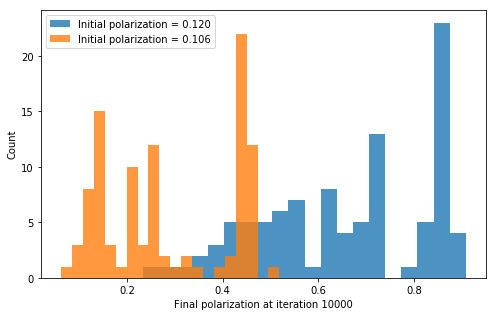

In [21]:
ccpol_address = 'connected caveman/polarization'

plt.figure(figsize=(7, 4.5))
    
if not os.path.isdir('data'):
    os.mkdir('data')
    
max_filename = os.path.join('data', 'final_rerun_maxpol_K=2.hdf')
min_filename = os.path.join('data', 'final_rerun_minpol_K=2.hdf')

if not os.path.exists(max_filename):
    print('Downloading max final pol file from Open Science Foundation...')
    urlretrieve('https://osf.io/q726e/download', max_filename)
if not os.path.exists(min_filename):
    print('Downloading min final pol file from Open Science Foundation...')
    urlretrieve('https://osf.io/vnhm4/download', min_filename)

    
with h5py.File(max_filename, 'r') as hdf:
    # Get the first of 100 trial's initial polarization.
    initial_polarization = hdf[ccpol_address][0, 0]
    # Confirm this is the same for all trials.
    same_ic_forall = np.all(
        initial_polarization == hdf[ccpol_address][:, 0]
    )
    
    print('All initial opinion distributions are identical: {}'.format(
        same_ic_forall
    ))
    
    plt.hist(hdf[ccpol_address][:, -1], 
             bins=20, alpha=0.8,
             label='Initial polarization = {:.3f}'.format(
                 initial_polarization
             )
            )
    

with h5py.File(min_filename, 'r') as hdf:
    initial_polarization = hdf[ccpol_address][0, 0]
    # Confirm this is the same for all trials.
    same_ic_forall = np.all(
        initial_polarization == hdf[ccpol_address][:, 0]
    )
    print('All initial opinion distributions are identical: {}'.format(
        same_ic_forall
    ))
    
    plt.hist(hdf[ccpol_address][:, -1], 
             bins=20, alpha=0.8, 
             label='Initial polarization = {:.3f}'.format(
                 initial_polarization
             )
            )

plt.xlabel('Final polarization at iteration 10000')
plt.ylabel('Count')
plt.legend()
save_path = os.path.join(FIGURE_DIR, 'caveman_extremes_histograms.pdf')
plt.savefig(save_path)

The files above were created using the following command on the supercomputing cluster. This command calls the `rerun_experiment` subcommand of the `polexp` command line interface (CLI), contained in [scripts/runner.py](scripts/runner.py). The example here runs 100 trials using the initial conditions from the minimum polarization value obtained in the initial $K=2$ run.

```bash
qsub -S /bin/bash -q fast.q -cwd -j y -V -l \
    mem_free=96G -pe smp 20 \
    -N rerun_min_K=2 -o log/rerun_min_K=2.log \
    -e log/err/rerun_min_K=2.err \
    ~/.conda/envs/complexity/bin/polexp rerun_experiment \
    "/scratch/mturner8/finegrained_K_4-18/" "K=2" \
    "/scratch/mturner8/final_rerun_minpol_K=2.hdf" \
    --trial_index=min --n_trials=100 --n_iterations=10000
```

# Polarization is sensitive to communication noise

This was the most data-intensive part, with 762 different parameter configurations, and 100 trial runs for each. Because we tracked opinion coordinates every XX iterations, the files are from 1-20MB each, making for a total of 11GB.

Can download a zipped archive (also 11GB as the component HDF are already compressed) from http://metacorps.io/static/data/noise_experiment.tar.gz. Decompress it to `data/noise_experiment`. 

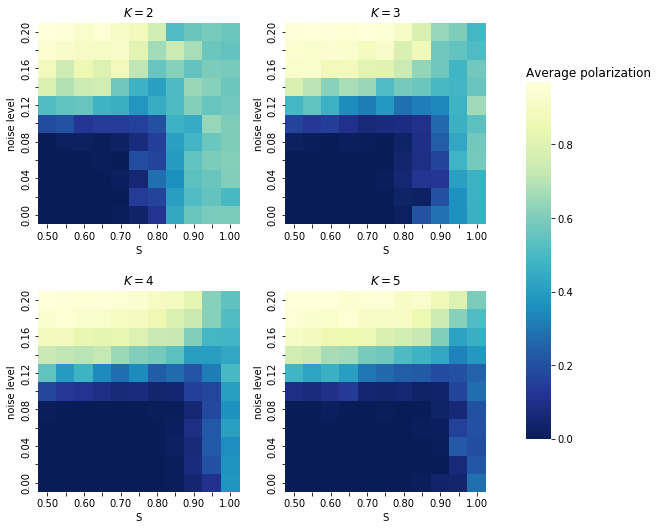

In [110]:
from complexity_analysis import plot_p_v_noise_and_k

ne_dir = os.path.join('data', 'noise_experiment')
# Ks is optional, limits to making heatmaps of 
# only one or a few K values. Add more to get other paper heatmaps
plot_p_v_noise_and_k(ne_dir, Ks=[2, 3, 4, 5], pub=True)
# With pub=True, figure is persisted to noise_experiement_heatmaps.pdf.

Then to understand the distribution of final polarizations for each
of these heatmap cells, we use a different function that makes Cartesian coordinate plots where either `noise level` or `S` is held constant and the other varies along the x-axis. In the examples below we will first hold $S$ at 0.5 and plot final polarization over noise levels. Then we will hold the noise level constant at 0.1 and observe nearly identical average final polarization, but with a considerable number of trials ending in high polarization.

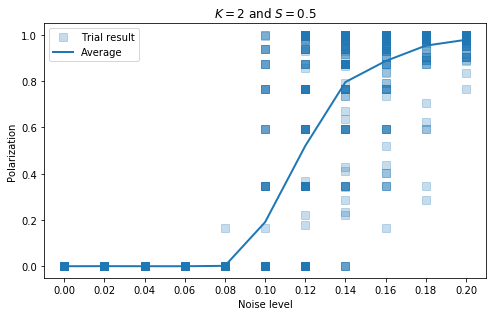

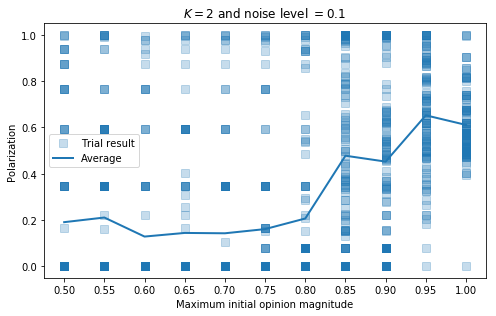

In [26]:
from complexity_analysis import plot_single_noise_param

plot_single_noise_param(ne_dir, 2, S=0.5, figsize=(7, 4.5))
plot_single_noise_param(ne_dir, 2, noise_level=0.10, figsize=(7, 4.5))